# Digital Signal Processing - Basics
-------------------------------------------

Some of the basic ideas of digital signal processing are convered in this tutorial
* Frequency mapping from analog to digital space (X)
* Writing functions based on above mapping (X)
* Direct simple implementation of fourier transform (X)
* Plotting the power spectrum of the signals (X)
* Looking at effect of high time-low frequency resolution on spectrum (X)
* Effect of zero padding of DFT resolution (X)


In [2]:
#Inserting the different packages required here
import numpy as np
import matplotlib.pyplot as plt

### Mapping frequency from analog to digital domain:
----------------------------------------------------------
First we look at the transformation in frequency mapping:

The sampled points are are represented by:
$t=nT_s$
Where $T_s$ is the sampling period

Now, for a simple sine wave we would usually write in the analog domain as:

$x_a=\sin(\omega*t)$

Here the analog frequency can be further be written in Hz as $2\pi F_a$ making the equation:

$x_d=\sin(2\pi F_anT_s)$, or more simply as:

$x_d=\sin(2\pi \frac{F_a}{F_s}n)$

Therefore, the relative analog frequency becomes: $f=\frac{F_a}{Fs}$

The digital frequency then in radians is given as, $\omega_d=\Omega_aT$

Given the nyquist limit of $F_a\le \frac{Fs}{2}$, we further get the range of the relative frequency to be: $f\le \frac{1}{2}$

### The Nyquist limit and behavior of $f$
------------------------------------------------------

Considering the digital signal with the relative frequency $f$ shown above:

$x_d=\sin(2\pi fn)$

For this signal to be **periodic** with a digital period of N we would require:  $2\pi f(n+N)= 2\pi fn$

Which implies: $2\pi fN=2\pi k$, where k is an integer, and so we get: $f=\frac{k}{N}$

Broadly this means, **frequency can only be rational**

Now also looking at $f$ when it is a periodic signal i.e. $f=\frac{k}{N}$, and how it changes:
$x_d=\sin(2\pi k\frac{n}{N})$

Considering, another frequency value of $f=\frac{k+N}{N}$, with this we would have again the digital signal expressed as a complex exponential:

$s_k(t)=\exp(j2\pi\frac{k}{N})$

$2\pi \frac{(k+N)n}{N}= 2\pi n+2\pi\frac{nk}{N}$

$s_k(t)=\exp(j2\pi\frac{k+N}{N})=\exp(j2\pi\frac{k}{N})\exp(j2\pi n)$

Given $n$ is an integer, $\exp(j2\pi n)$ would just be $1$

This implies, that for a given $N$, which is the **fundamental frequency**, then the number of exponentials that can exist are $N$ from $k=0$ to $k=N-1$



In [77]:
#defining the different parameters from the above sections
Fs=200   #sampling frequency
N=200   #period for every 100 samples
k=3
F=k/N*Fs

print('Fundamental frequency is',F)

print('Possible frequencies which repeat for the same number of samples are',Fs/F)

f=F/Fs   #relative frequency
n=np.arange(0,(Fs/F)*5)  #number of periods given by the signal

xd=np.sin(2*np.pi*f*n)  #signals

Fundamental frequency is 3.0
Possible frequencies which repeat for the same number of samples are 66.66666666666667


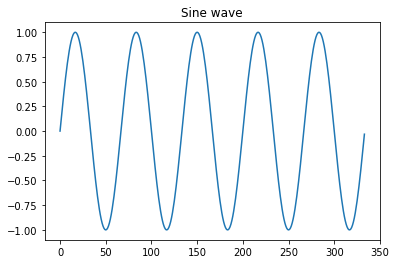

In [76]:
plt.plot(xd)
plt.title('Sine wave')
plt.show()

### Implementing the fourier transform
-----------------------
One of the most important things noted before is that,
 
Given a value of N, we have **N complex exponentials to represent** the signal, as in the case of analog signals there are infinite exponentials given from the equation,
 
$x(t)=\sum_{k=-\infty}^{\infty}a_k\exp{jk\omega_{0}t}$

Where, $\omega_{0}=\frac{2\pi}{T_{o}}$ is the fundamental frequency, as any signal is always represented by these harmonically related sinosoids, therefore, multiples of itself always for N exponentials in the analog frequency domain

Periodic signal --> Discrete sinosoidal components in spectrum

Non-periodic signal --> Contineous spectrum with a band of frequencies present

For going to discrete domain --> frequency mapping goes from $-\infty < F_a < \infty$ to $-\pi < F_d < \pi$, this would still remain contineous in this domain but for processing, we can think of **sampling the frequency representaiton at a specific sampling rate of  $\frac{2\pi}{N}$ **. Which is equal to replacing the contineous domain frequency by its N possible exponentials in this case.

Transforming it back into time domain has two important ideas -->
* The signal **acts** as periodic with a peroid of N samples (which was the assumed case in the beginning)
* A discrete spectrum is usually the case with periodic signals and asumming it to b periodic has the exact desiered output

While with the discrete time fourier transform represents the series as:

$X(k)=\sum_{k=0}^{N-1}x(n)\exp{-j2\pi\frac{kn}{N}}$

Analog frequency equivalent here is 10.0


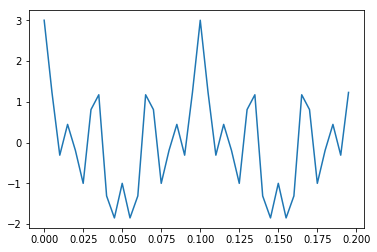

In [133]:
#defining the signal --> k/N=1/m
#defining the different parameters from the above sections
Fs=200   #sampling frequency
m=20   #oscillation rate for k=1, this is the fundamental period
N=2*m    #This N represents the number of points for which we do our DFT --> line spacing value and fundamentals
n=np.arange(0,N)
F=Fs/m
print('Analog frequency equivalent here is',F)
f=(1/m)

x_n=np.cos(2*np.pi*f*n)+ np.cos(2*np.pi*(F+2*F)/Fs*n) #np.exp(1j*(-2*np.pi)*f*n)
x_n=x_n+np.cos(2*np.pi*(F+5*F)/Fs*n)
plt.plot(n/Fs,x_n)
plt.show()

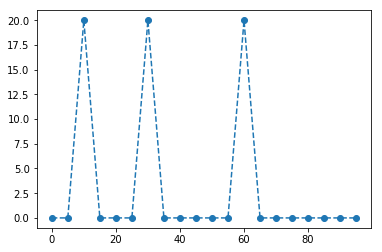

In [136]:
ls=2*np.pi/N  #line separation for each point in the frequency domain as I have considered my N to be specfic value
x_k=[]
for k in range(0,N):   #for each x[k] output
    s=0
    for n in range(0,N):  #iterating over all the complex exponentials
        val=x_n[n]*np.exp((-2j*np.pi)/N*k*n)
        s=val+s   #sum for this value of k
    x_k.append(s)
x_k=np.array(x_k)
freq=np.arange(0,N)/N*Fs    #conversion of 2pi/N sampling to analog frequency domain --> Fs/N divisions
x_abs=np.abs(x_k)
h=int(len(freq)/2)

plt.plot(freq[0:h],x_abs[0:h],linestyle='--',marker='o')
plt.show()

**Note**
* fundamental frequency is decided by the line spaciing (number of points of DFT) we choose irrespective of what actual frequencies in the signal are
* It guides of what we can see in the signal (frequency resolution itself)
* The fundamental frequency for complex exponentials is **VERY DIFFERENT ** from the fundamental oscalliation m , which is decided based on the frequency relative to the sampling rate in the signal